In [1]:
using BasisFunctions
using FrameFuns
using PyPlot
using Interact, Reactive

  likely near /Users/roelmatthysen/.julia/v0.4/Interact/src/IJulia/setup.jl:153
  likely near /Users/roelmatthysen/.julia/v0.4/Interact/src/IJulia/setup.jl:157
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_from_node1 at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_from_node1 at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_from_node1 at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dylib
 in require at /Users/roelmatthysen/Documents/Julia-0.4.2.app/Contents/Resources/julia/lib/julia/sys.dyl

### One-dimensional approximations

In [21]:
B = FourierBasis(61);
D = Interval(-0.5,0.5);
f1(x) = sin(x)
F1 = Fun(f1,B,D)

LoadError: LoadError: MethodError: `convert` has no method matching convert(::Type{BasisFunctions.FourierBasis{EVEN,T}})
This may have arisen from a call to the constructor BasisFunctions.FourierBasis{EVEN,T}(...),
since type constructors fall back to convert methods.
Closest candidates are:
  convert{T}(::Type{T}, !Matched::T)
  BasisFunctions.FourierBasis{T}(, !Matched::Any, !Matched::Type{T})
  BasisFunctions.FourierBasis{T}(, !Matched::Any, !Matched::T, !Matched::T)
  ...
while loading In[21], in expression starting on line 1

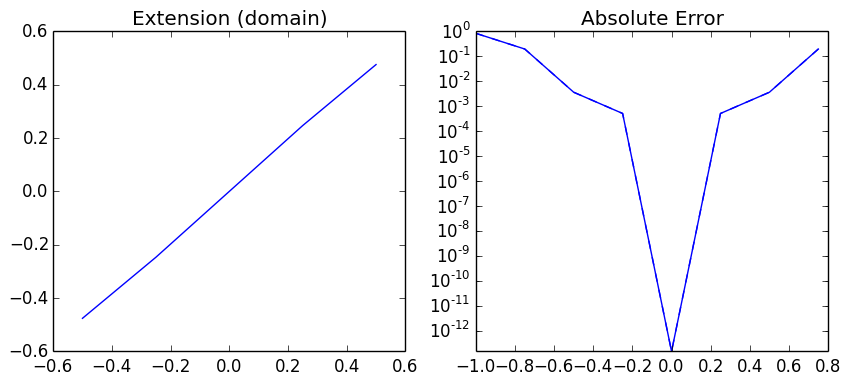

PyObject <matplotlib.text.Text object at 0x30aff9110>

In [3]:
figure(figsize=(10,4))
subplot(121); FrameFuns.plot(F1,n=8)
subplot(122); plot_error(F1,f1,n=8)

In [4]:
F1(0.0); G1=BasisFunctions.grid(basis(F1)); [G1[i] for i in eachindex(G1)];F1(0.1111111)

0.11132827297203829 - 8.387734951043058e-14im

In [9]:
f2(x) = cos(80*x)
F2 = Fun(f2, B, D)

A 1-dimensional FrameFun with 8 degrees of freedom.
Basis: Fourier series
Domain: the interval [-0.5, 0.5]


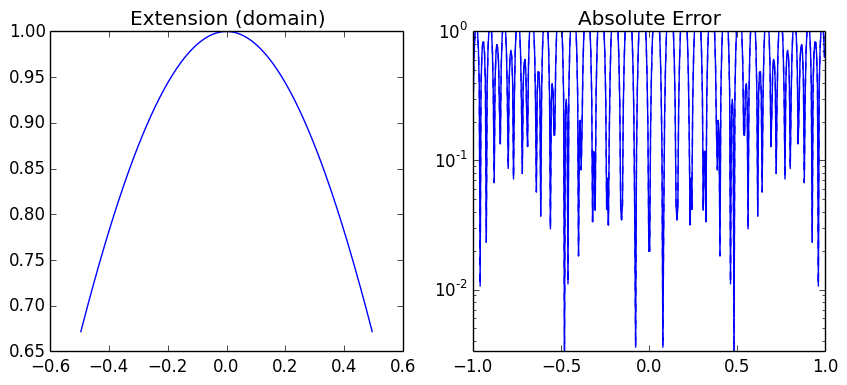

PyObject <matplotlib.text.Text object at 0x31a2489d0>

In [10]:
figure(figsize=(10,4))
subplot(121); FrameFuns.plot(F2,n=401)
subplot(122); FrameFuns.plot_error(F2,f2,n=401)

In [11]:
F2(0.1)

0.9858988971835949 - 1.3877787807814457e-17im

In [12]:
cos(8)

-0.14550003380861354

In [13]:
f3(x) = cos(10*x.^2)
B = ChebyshevBasis(41)
D = Interval(-1.0,0.9)
F3 = Fun(f3,B,D)

A 1-dimensional FrameFun with 41 degrees of freedom.
Basis: Chebyshev series (first kind)
Domain: the interval [-1.0, 0.9]


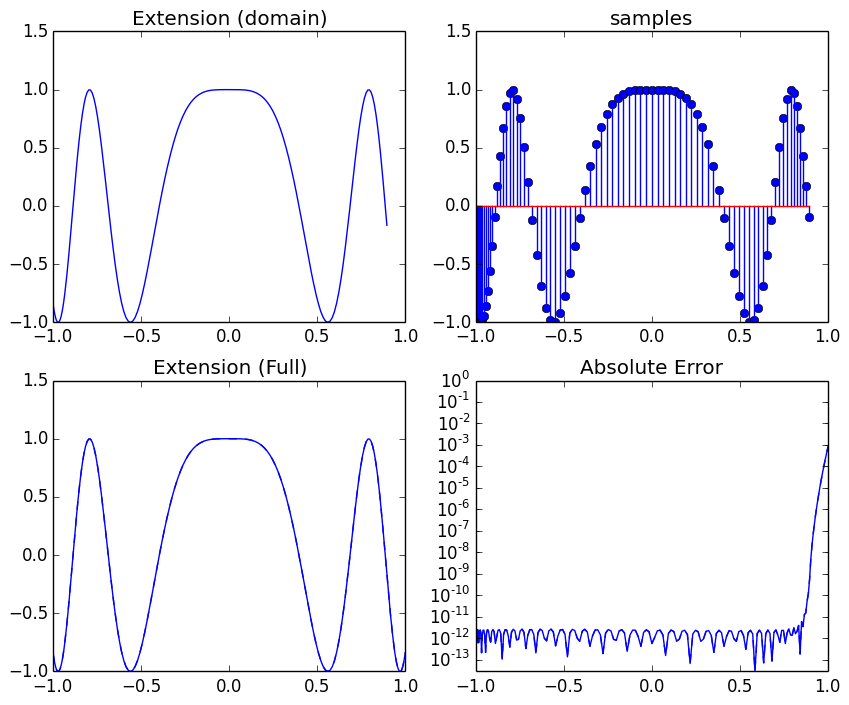

PyObject <matplotlib.text.Text object at 0x31a8d0150>

In [14]:
figure(figsize=(10,8))
subplot(221); FrameFuns.plot(F3)
subplot(222); plot_samples(F3)
subplot(223); plot_expansion(F3)
subplot(224); plot_error(F3,f3)

### High precision

In [15]:
B = FourierBasis(61,Complex{BigFloat})
D = Interval(-0.5,0.5)
fh(x) = x
Fh = Fun(fh,B,D)

A 1-dimensional FrameFun with 61 degrees of freedom.
Basis: Fourier series
Domain: the interval [-0.5, 0.5]


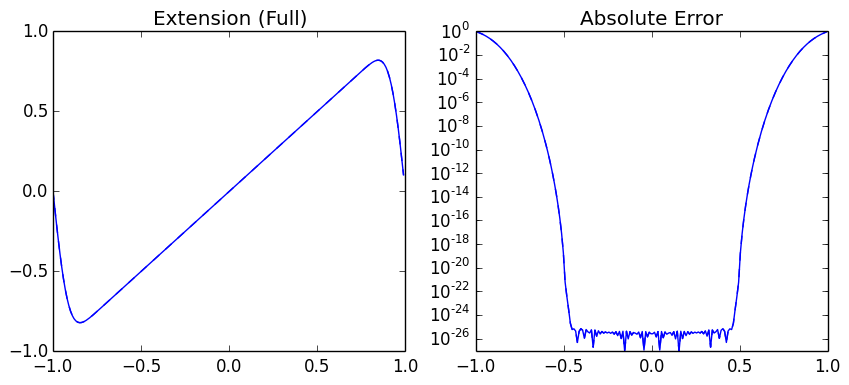

PyObject <matplotlib.text.Text object at 0x314c0e6d0>

In [16]:
figure(figsize=(10,4))
subplot(121); plot_expansion(Fh)
subplot(122); plot_error(Fh,fh)

In [20]:
Fh(0.1)-0.1

8.326672680607977125368610028852790075476326955435614674897088448354021397758795e-17 - 1.295425283264166693807952779420059935667400054665442207753555520525288770474364e-75im

In [16]:
left(basis(set(Fh)))

-1

### 2D approximations

##### Simple domains and simple functions

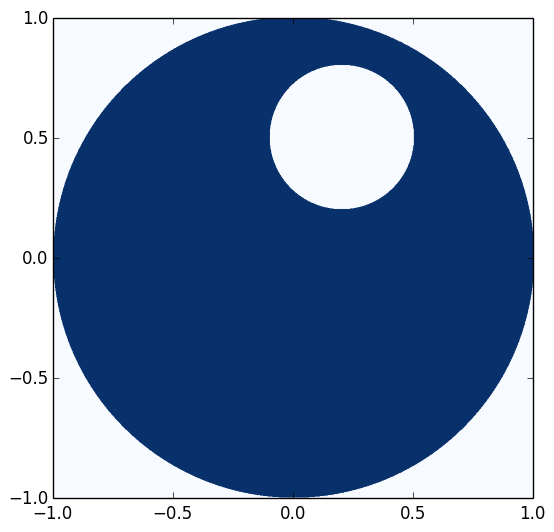

PyObject <matplotlib.image.AxesImage object at 0x318ceefd0>

In [17]:
C = Disk(1.0)- Disk(0.3,[0.2; 0.5]); FrameFuns.plot_domain(C, n=1000)

In [18]:
B = FourierBasis(31,-1.3,1.3) ⊗ FourierBasis(31,-1.3,1.3)
f(x,y) = exp(y+x)
F = Fun(f,B,C)

A 2-dimensional FrameFun with 961 degrees of freedom.
Basis: tensor product (Fourier series, mapped to [ -1.3  ,  1.3 ] x Fourier series, mapped to [ -1.3  ,  1.3 ])
Domain: the difference of two domains: 
    First domain: a circle of radius 1.0 centered at [0.0,0.0]
    Second domain: a circle of radius 1.0 centered at [0.0,0.0]



In [19]:
F(-0.6,0.4)

0.8187308532206607 + 2.46847875473577e-10im

In [20]:
f(-0.6, 0.4)

0.8187307530779819

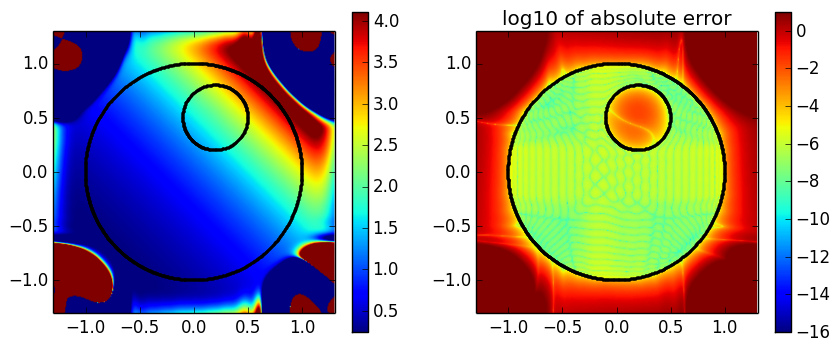

PyObject <matplotlib.text.Text object at 0x318dd54d0>

In [21]:
figure(figsize=(10,4))
subplot(121); plot_image(F); axis("scaled"); xlim([-1.3,1.3]); ylim([-1.3,1.3])
subplot(122); plot_error(F,f)

##### Simple domains and harder functions

In [22]:
dom = FrameFuns.randomcircles(10)

a collection of 10 domains

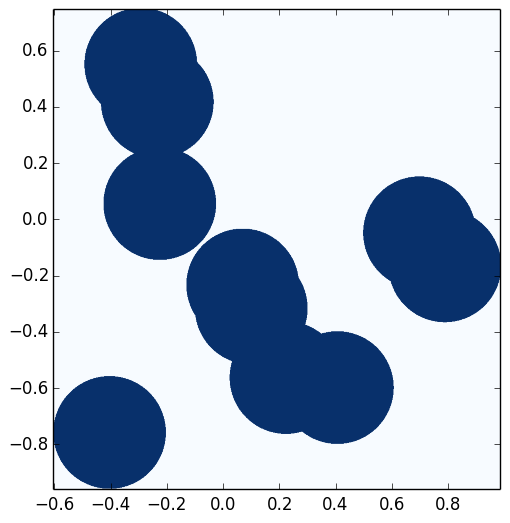

In [23]:
FrameFuns.plot_domain(dom,n=1000);

In [24]:
B = FourierBasis(31) ⊗ ChebyshevBasis(31)
f(x,y) = cos(20*x+22*y)
F = Fun(f,B,dom)

A 2-dimensional FrameFun with 961 degrees of freedom.
Basis: tensor product (Fourier series x Chebyshev series (first kind))
Domain: a collection of 10 domains


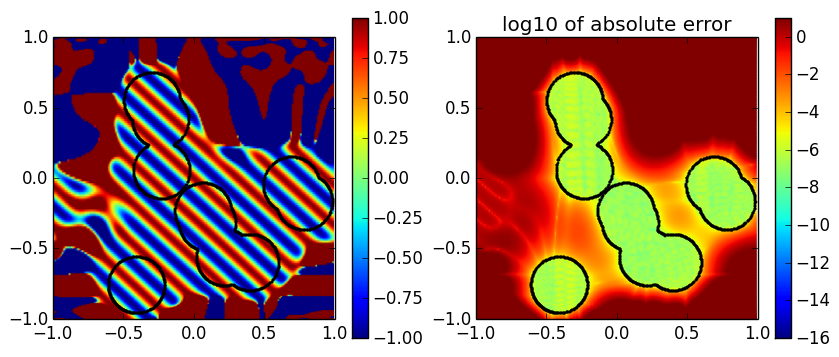

PyObject <matplotlib.text.Text object at 0x31d5c2310>

In [25]:
figure(figsize=(10,4))
subplot(121); plot_image(F,n=201)
subplot(122); plot_error(F,f,n=201)

##### Fractal domains

In [26]:
mandelbrot=FrameFuns.Mandelbrot()

The Mandelbrot set

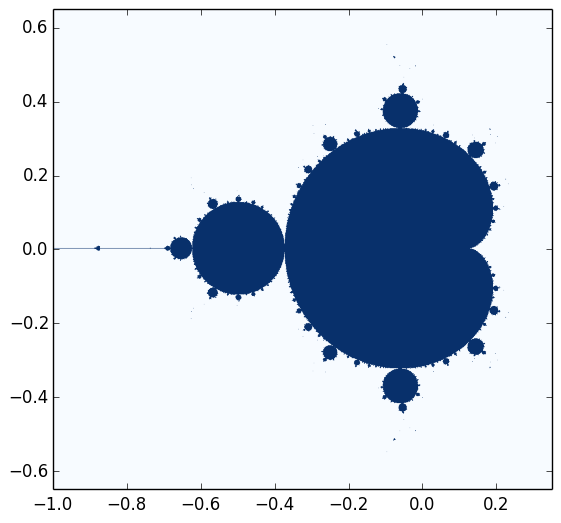

PyObject <matplotlib.image.AxesImage object at 0x31889c790>

In [27]:
plot_domain(mandelbrot, n=1001)

In [28]:
B = FourierBasis(31,-1.0,0.35) ⊗ FourierBasis(31,-0.65,0.65)
f(x,y) = cos(10*x*y)
F = Fun(f, B, mandelbrot)

A 2-dimensional FrameFun with 961 degrees of freedom.
Basis: tensor product (Fourier series, mapped to [ -1.0  ,  0.35 ] x Fourier series, mapped to [ -0.65  ,  0.65 ])
Domain: The Mandelbrot set


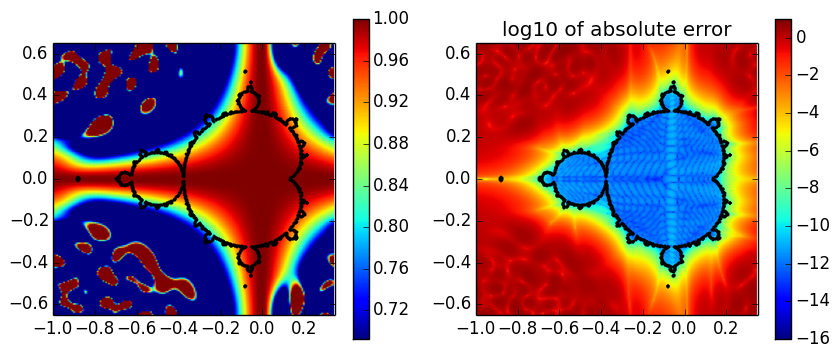

PyObject <matplotlib.text.Text object at 0x316e942d0>

In [29]:
figure(figsize=(10,4))
subplot(121); plot_image(F,n=201)
subplot(122); plot_error(F,f,n=201)

In [30]:
julia = JuliaSet()

A particular Julia Set also known as the Douady rabbit

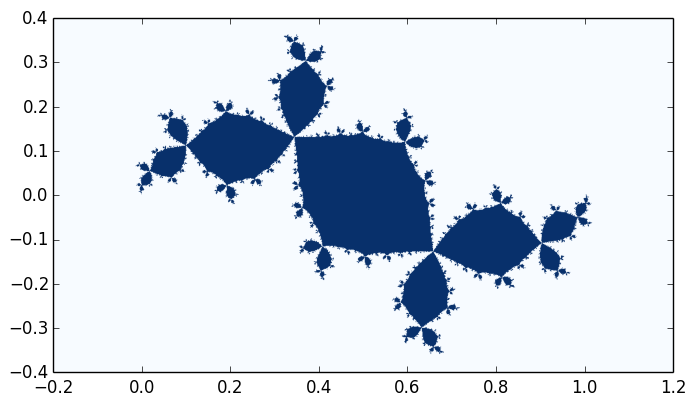

PyObject <matplotlib.image.AxesImage object at 0x318d22e90>

In [31]:
plot_domain(julia)

In [32]:
B = ChebyshevBasis(31,-0.2,1.2) ⊗ ChebyshevBasis(31, -0.4, 0.4)
f(x,y) = cos(10*x*y)
F = Fun(f, B, julia)

A 2-dimensional FrameFun with 961 degrees of freedom.
Basis: tensor product (Chebyshev series (first kind), mapped to [ -0.2  ,  1.2 ] x Chebyshev series (first kind), mapped to [ -0.4  ,  0.4 ])
Domain: A particular Julia Set also known as the Douady rabbit


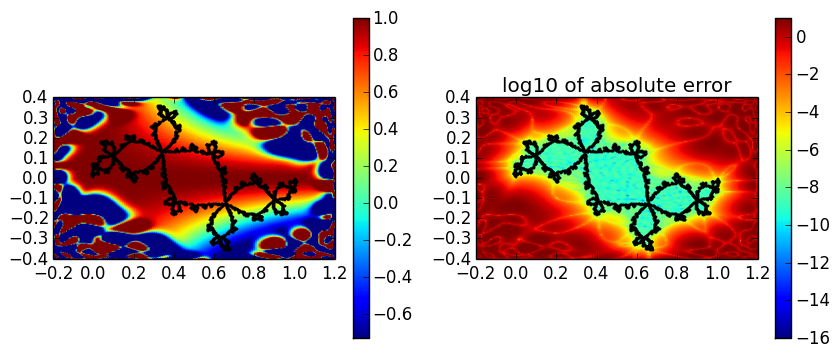

PyObject <matplotlib.text.Text object at 0x31b597290>

In [33]:
figure(figsize=(10,4))
subplot(121); plot_image(F,n=201)
subplot(122); plot_error(F,f,n=201)